# Animations Example
These are some examples of using the animation function included in my module **`wt_utils`**.


If you have trouble running the examples in this notebook, try executing this in a ternminal to ensure you are fully up to date:
~~~
conda update --yes ipywidgets
~~~

Please also note that there is a bug in Chrome which sometimes causes plots not to appear until the animation is started. Resizing the window makes them appear.

In [1]:
%pylab inline
import wt_utils

Populating the interactive namespace from numpy and matplotlib


### Basic usage
Here is a simple example of how you can use the `animate` function in your code.
To animate a given quantity, place your code in a function that accepts a single parameter. Next, run the function `wt_utils.animate(...)` with two parameters. The first parameter is the name of your function, the second parameter is an iterable containing the values to be to be run through your function.

If, for example, your executed `wt_utils.animate(my_func, arg=[1,5,9])`, then `my_func` would be executed with `arg=1`, then `arg=5`, and finally `arg=9`. It is important to note that the user may pause or restart the animation at any point, so you cannot rely on the order of the parameters.

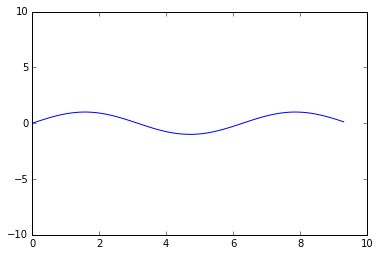

In [2]:
def plotting_function(t):
    x = arange(0, t, .1)
    y = sin(x)
    plot(x,y)
    ylim(-10, 10)
    xlim(0, 10)
    
wt_utils.animate(plotting_function, t=linspace(0, 10, 30))

## Complex Plot
Here is a more complex example, involving three subplots.
The plotting function takes longer to run, so I have reduced the default update speed to 5Hz, down from the default 10Hz.

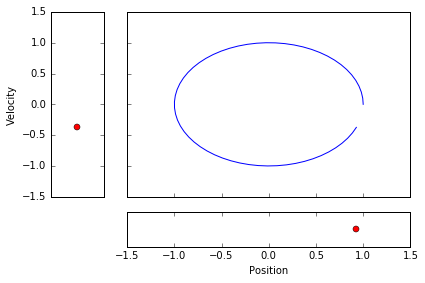

In [3]:
def plotting_function2(time):
    
    vel = subplot2grid((5, 5), (0, 0), colspan=1, rowspan=4)
    phase = subplot2grid((5, 5), (0, 1), colspan=4, rowspan=4)
    pos = subplot2grid((5, 5), (4, 1), colspan=4, rowspan=1)
    
    t = arange(0, time, .1)
    if time == 0:
        t = array([0])
    x = cos(t)
    v = sin(t)
    
    vel.plot([0], [v[-1]], 'ro')
    vel.set_ylim(-1.5, 1.5)
    vel.set_xlim(-1,1)
    vel.set_ylabel('Velocity')
    vel.tick_params(
        axis='x',          # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        top='off',
        bottom='off',      # ticks along the bottom edge are off
        labelbottom='off') # labels along the bottom edge are off
    
    pos.plot([x[-1]], [0], 'ro')
    pos.set_ylim(-1.5, 1.5)
    pos.set_xlim(-1.5, 1.5)
    pos.set_xlabel('Position')
    pos.tick_params(
        axis='y',
        which='both',
        left='off',
        right='off',
        labelleft='off')
    
    phase.plot(x, v)
    phase.set_ylim(-1.5, 1.5)
    phase.set_xlim(-1.5, 1.5)
    phase.tick_params(
        axis='both',
        which='both',
        right='off',
        top='off',
        labelleft='off',labelbottom='off')
    
    tight_layout()
    
wt_utils.animate(plotting_function2, time=linspace(0, 10, 100), speed=5)